# Model Description
 


In [239]:
"""
Model name = fashionMNIST
Dataset = FashMNIST
Model description = 2 layered CNN with 2 layer Maxpooling and same padding
Test Accuracy= 90.43%

"""
 

'\nModel name = fashionMNIST\nDataset = FashMNIST\nModel description = 2 layered CNN with 2 layer Maxpooling and same padding\nTest Accuracy= 89.6%\n\n'

# STEPS

### -Step1- Import necessary libraries 
### -Step2-  Create Dataset
### - Step3 -Load Dataset
### - Step4-Make Dataset iterable
### - Step5-Create Model class
### - Step-6- Instantiate Model Class
### - Step7- Instantiate Loss Class
### - Step8- Instantiate Optimizer Class
### - Step9 - Train Model


## Importing libraries and modules


In [240]:
'''IMPORTING NECESSARY MODULES'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

import os
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()

In [241]:
''' Device configuration'''

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # For GPU 


## Create Dataset

In [242]:

''' Create Dataset CLass '''

import codecs
from PIL import Image
training_file = 'training.pt'
test_file = 'test.pt'

class FashMNIST(Dataset):
    
    """`MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.
       Args:
        root (string): Root directory of dataset where ``processed/training.pt``
            and  ``processed/test.pt`` exist.
        train (bool, optional): If True, creates dataset from ``training.pt``,
            otherwise from ``test.pt``.
        download (bool, optional): If true, downloads the dataset from the internet and
            puts it in root directory. If dataset is already downloaded, it is not
            downloaded again.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
    """
    urls = [
           'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
           'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
           'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
           'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz',
           ]
    
    
    training_file = 'training.pt'
    test_file = 'test.pt'
        
    def __init__(self, path, train=True, transform=None,target_transform=None):

        self.path = path
        self.train = train  # training set or test set
        self.transform = transform
        self.target_transform=target_transform
        

        if self.train:
            training_set = (
                read_image_file(os.path.join(self.path, 'train-images-idx3-ubyte')),
                read_label_file(os.path.join(self.path, 'train-labels-idx1-ubyte'))
            )
            
            with open(os.path.join(path, training_file), 'wb') as f:
                torch.save(training_set, f)
            
            self.train_data, self.train_labels = torch.load(
                os.path.join(self.path, self.training_file))

        else:
            test_set = (
                read_image_file(os.path.join(self.path, 't10k-images-idx3-ubyte')),
                read_label_file(os.path.join(self.path, 't10k-labels-idx1-ubyte'))
            )
            
            with open(os.path.join(path, test_file), 'wb') as f:
                torch.save(test_set, f)
            
            self.test_data, self.test_labels = torch.load(
                os.path.join(self.path, self.test_file))
            
    def __getitem__(self, index):  # it mostly works on cpu 
        
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        
        if self.train:
            img, target = self.train_data[index], self.train_labels[index]
        else:
            img, target = self.test_data[index], self.test_labels[index]
            
        # doing this so that it is consistent with all other datasets
        # to return a PIL Image    
            
        img = Image.fromarray(img.numpy(), mode='L')
                
        if self.transform is not None:
            img = self.transform(img)
               
        return img, target
    
    
    
    
    def __len__(self):   # returns the size of the dataset
        if self.train:
            return len(self.train_data)
        else:
            return len(self.test_data)
        
        
        
        
    def get_int(b):   
        return int(codecs.encode(b, 'hex'), 16)

    def read_label_file(path):
        with open(path, 'rb') as f:
            data = f.read()
            assert get_int(data[:4]) == 2049
            length = get_int(data[4:8])
            parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
            return torch.from_numpy(parsed).view(length).long()


    def read_image_file(path):
        with open(path, 'rb') as f:
            data = f.read()
            assert get_int(data[:4]) == 2051
            length = get_int(data[4:8])
            num_rows = get_int(data[8:12])
            num_cols = get_int(data[12:16])
            images = []
            parsed = np.frombuffer(data, dtype=np.uint8, offset=16)
            return torch.from_numpy(parsed).view(length, num_rows, num_cols)

In [243]:
print(len(train_dataset))

60000


In [244]:
print(len(test_dataset))

10000


In [245]:
type(train_dataset)

__main__.FashMNIST

In [246]:
type(test_dataset)

__main__.FashMNIST

In [247]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [248]:
test_dataset[0][0].numpy().shape

(1, 28, 28)

In [249]:
show_img=train_dataset[0][0].numpy().reshape(28,28)

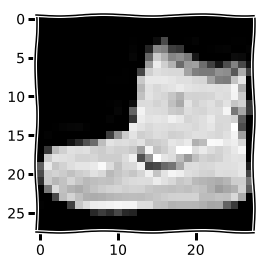

In [250]:
plt.imshow(show_img,cmap='gray')

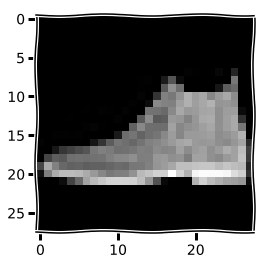

In [251]:
show_img=test_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img,cmap='gray')

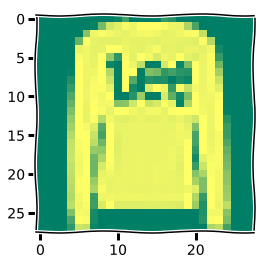

In [252]:
show_img=test_dataset[1][0].numpy().reshape(28,28)
plt.imshow(show_img,cmap='summer')

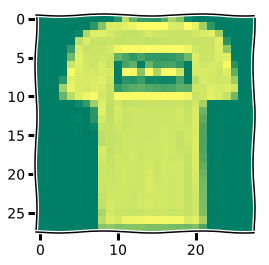

In [253]:
show_img=train_dataset[1][0].numpy().reshape(28,28)
plt.imshow(show_img,cmap='summer')

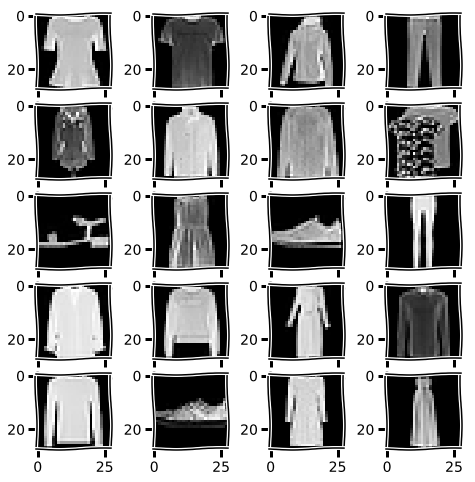

In [254]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;

for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    #plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('on')
    plt.imshow(img, cmap='gray')
plt.show()

## Load Dataset

In [255]:

# Datasets are manually downloaded and placed inside ./fashdata

train_dataset = FashMNIST(path = 'fashdata', train = True, transform = transforms.ToTensor())
test_dataset = FashMNIST(path = 'fashdata', train = False, transform = transforms.ToTensor())

## Make Dataset iterable

In [256]:
batch_size=150                   # not fixed and changed accordingly to get maximum accuracy 
n_iters= 30000                   # more iterations or epochs doesn't ensure maximum accuracy it varies from model to model.
num_epochs=n_iters/(len(train_dataset)/batch_size)
num_epochs=int(num_epochs)


In [257]:

print("Number of Iterations    =", n_iters)
print("Number of Epochs        = ", num_epochs)


Number of Iterations    = 30000
Number of Epochs        =  75


In [258]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True)# to shuffle image each iteration 
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                       batch_size=batch_size,
                                       shuffle=False)# no need to shuffle as we want to test one image 

## Create Model Class

In [259]:
class CNNModel(nn.Module):
    def __init__(self):                            
        super(CNNModel,self).__init__()
        #convolution1 with same padding
        self.cnn1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2)
        self.relu1=nn.ELU()
        
        # Maxpool1
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        #convolution2 with same padding
        self.cnn2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=2)
        self.relu2=nn.ELU()
        
        # Maxpool2
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        # Fully connected layer (readout layer)
        self.fc1=nn.Linear(32*7*7,10)
        
    def forward(self,x):
        # convolution 1
        out=self.cnn1(x)
        out=self.relu1(out)
        
        
        # Maxpool 1
        out=self.maxpool1(out)
        
        
        # Convolution 2
        out=self.cnn2(out)
        out=self.relu2(out)
        
       # Maxpool 2       
        out=self.maxpool2(out)
        
        
        #because the original size is (100,32*7*7)
        # we cannot feed 3D size into  linear function so need to take 1D and -1 here denotes to reshape to original
  
        out=out.view(out.size(0),-1)
        
        
        #Linear Function (readout)
        out=self.fc1(out)
        
        return out
        
    """
    The purpose of using CNN over RNN is because CNN ares ideal for image and video processing while RNN are used for text and speech analysis.
    CNNs use connectivity pattern between its neurons(the basic units like pixels) while RNN  use time-series informations.
  
   
    """
        
        
        
        

## Instantiate Model Class

In [260]:
model=CNNModel().to(device)

## Instantiate Loss Class

In [261]:
criterion=nn.CrossEntropyLoss()

## Instantiate Optimizer Class

In [262]:
learning_rate=0.015
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

## Train Model CLass



In [229]:
test_loss =[]
test_accuracy =[]
losses=[]

iter =0
for epoch in range(num_epochs):
    for i ,(images,labels) in enumerate(train_loader):
        
        images=Variable(images) .to(device)## loading images and labels as variables
        
        labels=Variable(labels).to(device)
        
        optimizer.zero_grad() # clear gradients
        
        outputs=model(images) # forward pass images to get op/logits after 2 linear layers and 1 hidden layer
        
        loss=criterion(outputs,labels)#calculate softmaxx and cross entropy
        
        loss.backward()# getting gradients
        
        optimizer.step()# updating parameter
        
       
        #if (i+1) % 100 == 0:
            
            #print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                       #%(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
        
        
        iter +=1
        
        if iter % 500  == 0:
            
           
            correct=0
            total=0
              
            for images, labels in test_loader:
                
                images = images.to(device) # load images 
                
                labels = labels.to(device)# load labels
                
                outputs = model(images) # foreward pass to get logits/outputs
                
                _, predicted = torch.max(outputs.data, 1) # get predictions
                
                total += labels.size(0) # total no of labels
                
                correct += (predicted.cpu() == labels.cpu()).sum().item() # total correct predictions
               
                # print(correct)
            
            
            accuracy=100*(correct/total)
            
            test_loss.append(loss.data[0])
            test_accuracy.append(accuracy)
            
            print('iterations:  {} .loss:  {}.accuracy:  {}'.format(iter,loss.data[0],accuracy))
            

iterations:  500 .loss:  0.6187989711761475.accuracy:  76.67
iterations:  1000 .loss:  0.48660650849342346.accuracy:  80.12
iterations:  1500 .loss:  0.5947065949440002.accuracy:  81.13
iterations:  2000 .loss:  0.3452574610710144.accuracy:  84.28
iterations:  2500 .loss:  0.3144873380661011.accuracy:  85.07000000000001
iterations:  3000 .loss:  0.43143004179000854.accuracy:  85.25
iterations:  3500 .loss:  0.35649123787879944.accuracy:  85.91
iterations:  4000 .loss:  0.2965327501296997.accuracy:  86.53
iterations:  4500 .loss:  0.3004216253757477.accuracy:  86.81
iterations:  5000 .loss:  0.34889334440231323.accuracy:  86.39
iterations:  5500 .loss:  0.22929950058460236.accuracy:  86.6
iterations:  6000 .loss:  0.4104515612125397.accuracy:  87.47
iterations:  6500 .loss:  0.263668030500412.accuracy:  87.77000000000001
iterations:  7000 .loss:  0.28777584433555603.accuracy:  87.94999999999999
iterations:  7500 .loss:  0.3483067452907562.accuracy:  88.18
iterations:  8000 .loss:  0.380

In [231]:
print("Test Accuracy     : {:.2f}".format(np.mean(test_accuracy[-10:])))

Test Accuracy     : 90.43


## Plots and Relationship



In [232]:
model_name= 'fashionMNIST'

In [263]:
print(test_accuracy)
print(test_loss)

[76.67, 80.12, 81.13, 84.28, 85.07000000000001, 85.25, 85.91, 86.53, 86.81, 86.39, 86.6, 87.47, 87.77000000000001, 87.94999999999999, 88.18, 88.53999999999999, 88.44999999999999, 88.67, 88.25, 88.66000000000001, 88.6, 89.03999999999999, 89.11, 89.16, 89.08, 89.16, 88.91, 89.16, 89.58, 89.0, 89.37, 89.64, 89.39, 89.14999999999999, 89.96, 89.48, 89.84, 89.49000000000001, 89.05, 89.7, 89.74, 89.64999999999999, 89.86, 90.24, 90.03999999999999, 90.03, 90.05, 90.35, 90.07, 90.14999999999999, 90.47, 90.08, 90.38000000000001, 90.27, 90.55, 90.62, 90.41, 90.25, 90.61, 90.61]
[tensor(0.6188), tensor(0.4866), tensor(0.5947), tensor(0.3453), tensor(0.3145), tensor(0.4314), tensor(0.3565), tensor(0.2965), tensor(0.3004), tensor(0.3489), tensor(0.2293), tensor(0.4105), tensor(0.2637), tensor(0.2878), tensor(0.3483), tensor(0.3806), tensor(0.3642), tensor(0.1254), tensor(0.4130), tensor(0.2379), tensor(0.3387), tensor(0.2354), tensor(0.2538), tensor(0.2595), tensor(0.2824), tensor(0.3234), tensor(0.2

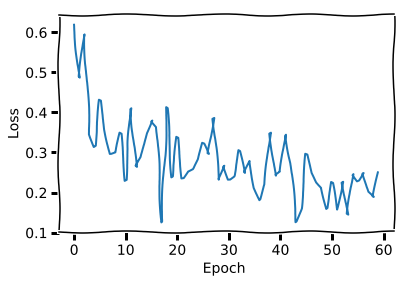

In [271]:
losses_in_epochs = test_loss[0::]
plt.xkcd()
plt.xlabel('Epoch ')
plt.ylabel('Loss')
plt.plot(losses_in_epochs)
plt.show()
plt.savefig('loss vs epoch.png', dpi=300,bbox_inches='tight')

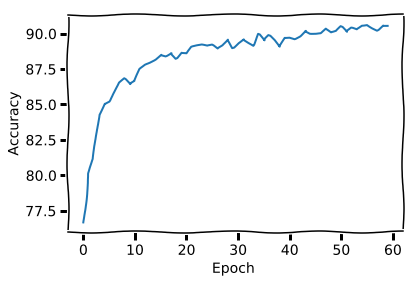

In [270]:
accuracy_in_epochs = test_accuracy[0::]
plt.xkcd()
plt.xlabel('Epoch ')
plt.ylabel('Accuracy')
plt.plot(accuracy_in_epochs)
plt.show()
plt.savefig('acc vs epoch.png', dpi=300, bbox_inches='tight')